# Atividade de Regrassão Logística - Base Titanic

In [68]:
# Importação das bibliotecas necessárias

import pandas as pd # para criação do data frame
from sklearn.model_selection import train_test_split # para separação dos conjuntos de treino e teste
from sklearn.linear_model import LogisticRegression # para construção do modelo de Regressão Logística
from sklearn import metrics # para computação das métricas de avaliação
from sklearn.metrics import confusion_matrix
import seaborn as sb # para visualização dos resultados
import matplotlib.pyplot as plt # plotagem de dados

In [69]:
titanic_base = pd.read_csv('../dados/titanic3.csv')

### Dicionário de dados:

- pclass: Classe na qual o passageiro viajava
- survived: Sobreviveu ou não sobreviveu a trajédia
- name: Nome do passageiro
- age: Idade do passageiro
- sibsp: Quantidade de irmãos e cônjujes do passageiro também na embarcação
- parch: Quantidade de crianças e idosos (pais) relativos ao passageiro
- ticket: Número do ticket do passageiro
- fare: Valor da tarifa paga pelo passageiro
- cabin: Identificador da cabine do passageiro
- embarket: Porto onde o passageiro embarcou
- boat: -
- body: Peso corporal do passageiro
- home.dest: Destino final do passageiro

In [70]:
titanic_base.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## Análise Exploratória e Data Missing

In [71]:
# Remocão de variaveis que foram consideradas como não relevante
titanic = titanic_base.drop(columns=["name", "cabin", "ticket", "boat", "home.dest"])

In [72]:
titanic.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,body
0,1,1,female,29.00,0,0,211.3375,S,NaN
1,1,1,male,0.92,1,2,151.5500,S,NaN
2,1,0,female,2.00,1,2,151.5500,S,NaN
3,1,0,male,30.00,1,2,151.5500,S,135.0
4,1,0,female,25.00,1,2,151.5500,S,NaN


In [73]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
pclass      1309 non-null int64
survived    1309 non-null int64
sex         1309 non-null object
age         1046 non-null float64
sibsp       1309 non-null int64
parch       1309 non-null int64
fare        1308 non-null float64
embarked    1307 non-null object
body        121 non-null float64
dtypes: float64(3), int64(4), object(2)
memory usage: 92.2+ KB


In [74]:
# Coloca as veriaveis vistas como categoricas no tipo categorico do pandas
titanic = titanic.astype({"pclass":'category', "survived":'category', "embarked":'category', "sex":'category'})

In [75]:
titanic.shape

(1309, 9)

In [76]:
# descricão da base de dados
titanic.describe()

,age,sibsp,parch,fare,body
count,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,29.881138,0.498854,0.385027,33.295479,160.809917
std,14.413493,1.041658,0.865560,51.758668,97.696922
min,0.170000,0.000000,0.000000,0.000000,1.000000
25%,21.000000,0.000000,0.000000,7.895800,72.000000
50%,28.000000,0.000000,0.000000,14.454200,155.000000
75%,39.000000,1.000000,0.000000,31.275000,256.000000
max,80.000000,8.000000,9.000000,512.329200,328.000000


In [77]:
# Aponta as colunas que possuem dados faltantes e a quantidade dos memsos por coluna.
def possui_nan(titanic):
    possui_nan = titanic.isnull().sum()
    print(possui_nan[possui_nan > 0])

In [78]:
possui_nan(titanic)

age          263
fare           1
embarked       2
body        1188
dtype: int64


In [79]:
# A coluna body possui mais de 80% dos valores faltando, poor isso será removido na análise
titanic = titanic.drop(columns="body")

In [80]:
titanic.corr()

,age,sibsp,parch,fare
age,1.000000,-0.243699,-0.150917,0.178740
sibsp,-0.243699,1.000000,0.373587,0.160238
parch,-0.150917,0.373587,1.000000,0.221539
fare,0.178740,0.160238,0.221539,1.000000


In [81]:
# Subistitui os dados faltantes pelo proximo valor existente
titanic[["fare", "embarked","age"]] = titanic[["fare", "embarked","age"]].fillna(method='ffill')

In [82]:
# Não existe mais valores faltantes
possui_nan(titanic)

Series([], dtype: int64)


In [83]:
# correlacão entre as variaveis da base de dados
titanic.corr()

,age,sibsp,parch,fare
age,1.000000,-0.219848,-0.162162,0.157243
sibsp,-0.219848,1.000000,0.373587,0.160388
parch,-0.162162,0.373587,1.000000,0.221668
fare,0.157243,0.160388,0.221668,1.000000


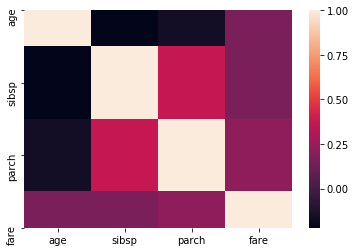

In [84]:
sb.heatmap(titanic.corr())

In [85]:
# convertenddo os dados categoricos da base de dados em dummy
titanic = pd.get_dummies(data=titanic)

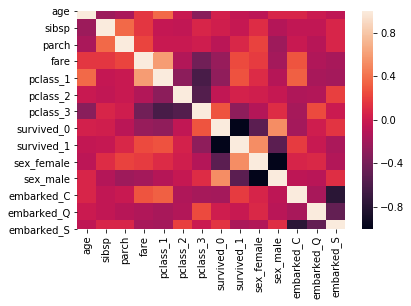

In [86]:
sb.heatmap(titanic.corr())

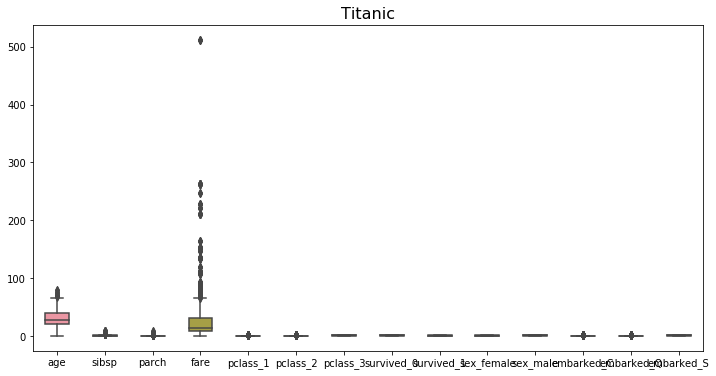

In [87]:
# Grafico boxplot para analise de distribuição dos dados e identificação de outliers
ax = sb.boxplot(data = titanic, width=0.5, )
ax.figure.set_size_inches(12,6)
ax.set_title('Titanic', fontsize = 16)
ax

In [88]:
# Consulta dos dados fora 
titanic[titanic["fare"]  > 400]

,age,sibsp,parch,fare,pclass_1,pclass_2,pclass_3,survived_0,survived_1,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
49,36.0,0,1,512.3292,1,0,0,0,1,0,1,1,0,0
50,58.0,0,1,512.3292,1,0,0,0,1,1,0,1,0,0
183,35.0,0,0,512.3292,1,0,0,0,1,0,1,1,0,0
302,35.0,0,0,512.3292,1,0,0,0,1,1,0,1,0,0


In [89]:
titanic["fare"].describe()

count    1309.000000
mean       33.276193
std        51.743584
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64

In [90]:
titanic_base[titanic_base["pclass"]  == 1]["pclass"].value_counts()

1    323
Name: pclass, dtype: int64

In [91]:
titanic_primeira_classe = titanic[titanic.pclass_1 == 1]

In [92]:
# De acordo com esses dados não são outliers, 
# mas tem um comportamento estranho para a variação de valores pagos na primeira classe
titanic_primeira_classe.fare.describe()

count    323.000000
mean      87.508992
std       80.447178
min        0.000000
25%       30.695800
50%       60.000000
75%      107.662500
max      512.329200
Name: fare, dtype: float64

## Inicio das predições 

## Regressão logistica

In [93]:
preditores = titanic.drop(columns=["survived_0","survived_1"])
alvo = titanic.survived_0

In [94]:
# Teste com a retirado dos outliers
# titanic = titanic[titanic["fare"] < 400]
# preditores = titanic.drop(columns=["survived_0","survived_1"])
# alvo = titanic.survived_0

In [95]:
# Divisão dos conjuntos de treino e teste

preditores_treino, preditores_teste, alvo_treino, alvo_teste = train_test_split(preditores, alvo, test_size=0.30, random_state=0)

In [96]:
# Instancia o modelo de regressão logística com parâmetros default
modelo_reglog = LogisticRegression()

# Treina o modelo com base nos preditores e variável alvo
modelo_reglog.fit(preditores_treino, alvo_treino)

# Prevê, para os dados do conjunto de teste, resultados para a variável alvo
alvo_pred = modelo_reglog.predict(preditores_teste)

C:\Users\Doglas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [97]:
# Matriz de confusão
print(confusion_matrix(alvo_teste, alvo_pred))

[[ 99  48]
 [ 31 215]]


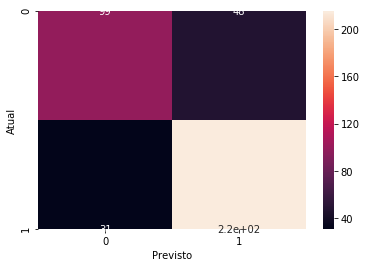

In [98]:
matriz_confusao = pd.crosstab(alvo_teste, alvo_pred, rownames=['Atual'], colnames=['Previsto'])

# Gera o gráfico da matriz de confusão
sb.heatmap(matriz_confusao, annot=True)

In [99]:
# Metricas de avaliação para modelos

print('Acurácia: ', metrics.accuracy_score(alvo_teste, alvo_pred))

print('Precisão: ', metrics.precision_score(alvo_teste, alvo_pred))

print('Revocação: ', metrics.recall_score(alvo_teste, alvo_pred))

print('F1-Measure: ', metrics.f1_score(alvo_teste, alvo_pred))

print('ROC AUC: ', metrics.roc_auc_score(alvo_teste, alvo_pred))

Acurácia:  0.7989821882951654
Precisão:  0.8174904942965779
Revocação:  0.8739837398373984
F1-Measure:  0.8447937131630648
ROC AUC:  0.7737265637962503


In [100]:
indices = ["Acurácia","Precisão", "Revocação", "F1-Measure", "ROC AUC" ]
resultados = pd.DataFrame(data={"resultados":indices,
                                'Regressão Logistica': [metrics.accuracy_score(alvo_teste, alvo_pred), metrics.precision_score(alvo_teste, alvo_pred),
                                                  metrics.recall_score(alvo_teste, alvo_pred), metrics.f1_score(alvo_teste, alvo_pred),
                                                  metrics.roc_auc_score(alvo_teste, alvo_pred)]})
resultados


,resultados,Regressão Logistica
0,Acurácia,0.798982
1,Precisão,0.817490
2,Revocação,0.873984
3,F1-Measure,0.844794
4,ROC AUC,0.773727


In [101]:
validacao_modelo = pd.DataFrame({'alvo_teste': alvo_teste, 'alvo_pred': alvo_pred})
validacao_modelo.head()

,alvo_teste,alvo_pred
1139,1,1
533,0,0
459,1,1
1150,1,1
393,1,1


## Arvore de Decissão

In [102]:
from sklearn.tree import DecisionTreeClassifier

# Cria uma instância default
dt = DecisionTreeClassifier()

# Treina o modelo com os dados dos alunos
arvore_decisao = dt.fit(preditores_treino, alvo_treino)

In [130]:
# Realiza a previsão nos dados de teste
arvore_previsao_proba = arvore_decisao.predict_proba(preditores_teste)
arvore_previsao = arvore_decisao.predict(preditores_teste)

[[ 93  54]
 [ 46 200]]


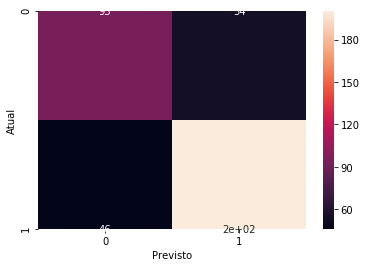

In [131]:
# Matriz de Confusão
print(confusion_matrix(alvo_teste, arvore_previsao))


matriz_confusao_arvore = pd.crosstab(alvo_teste, arvore_previsao, rownames=['Atual'], colnames=['Previsto'])

# Gera o gráfico da matriz de confusão
sb.heatmap(matriz_confusao_arvore, annot=True)

In [132]:
print("Acurácia: ", metrics.accuracy_score(alvo_teste, arvore_previsao))

print('Precisão: ', metrics.precision_score(alvo_teste, arvore_previsao))

print('Revocação: ', metrics.recall_score(alvo_teste, arvore_previsao))

print('F1-Measure: ', metrics.f1_score(alvo_teste, arvore_previsao))

print('ROC AUC: ', metrics.roc_auc_score(alvo_teste, arvore_previsao))

Acurácia:  0.7455470737913485
Precisão:  0.7874015748031497
Revocação:  0.8130081300813008
F1-Measure:  0.8
ROC AUC:  0.7228305956528953


In [133]:
resultados["Arvore de Decissão"] = [metrics.accuracy_score(alvo_teste, arvore_previsao),metrics.precision_score(alvo_teste, arvore_previsao),
                                   metrics.recall_score(alvo_teste, arvore_previsao), metrics.f1_score(alvo_teste, arvore_previsao),
                                   metrics.roc_auc_score(alvo_teste, arvore_previsao)]
resultados

,resultados,Regressão Logistica,Arvore de Decissão
0,Acurácia,0.798982,0.745547
1,Precisão,0.817490,0.787402
2,Revocação,0.873984,0.813008
3,F1-Measure,0.844794,0.800000
4,ROC AUC,0.773727,0.722831


In [134]:
feature_importances_arvore = pd.DataFrame(arvore_decisao.feature_importances_,
                                   index = preditores_treino.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances_arvore

,importance
sex_female,0.298527
fare,0.264507
age,0.244617
pclass_3,0.081260
sibsp,0.045815
pclass_1,0.020193
parch,0.019755
embarked_Q,0.011287
embarked_C,0.011135
embarked_S,0.002402


In [135]:
melhores_features = pd.DataFrame(data= feature_importances_arvore)
melhores_features.columns = ['Arvore de Decissão']
melhores_features

,Arvore de Decissão
sex_female,0.298527
fare,0.264507
age,0.244617
pclass_3,0.081260
sibsp,0.045815
pclass_1,0.020193
parch,0.019755
embarked_Q,0.011287
embarked_C,0.011135
embarked_S,0.002402


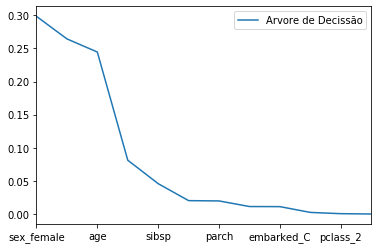

In [136]:
feature_importances_arvore.plot()

In [137]:
# Biblioteca para plotar arvore de deccissão
#! pip install graphviz

## Floresta Aleatoria

In [138]:
from sklearn.ensemble import RandomForestClassifier

In [140]:
# Instanciao objeto da Floresta Aleatória e define o número de árvores a serem utilizadas
floresta = RandomForestClassifier(n_estimators=1000)

# x_train, x_test, y_train, y_test

# Treinamento do modelo
floresta.fit(preditores_treino, alvo_treino)

# Prevê a partir dos preditores de testes
predicted = floresta.predict(preditores_teste)
predicted_proba = floresta.predict_proba(preditores_teste)

[[ 93  54]
 [ 46 200]]


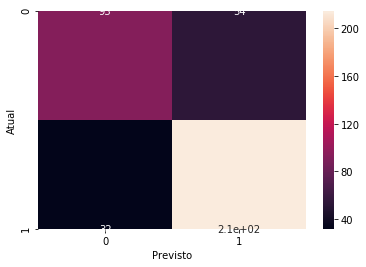

In [142]:
# Matriz de Confusão
print(confusion_matrix(alvo_teste, arvore_previsao))


matriz_confusao_arvore = pd.crosstab(alvo_teste, predicted, rownames=['Atual'], colnames=['Previsto'])

# Gera o gráfico da matriz de confusão
sb.heatmap(matriz_confusao_arvore, annot=True)

In [143]:
print("Acurácia: ", metrics.accuracy_score(alvo_teste, predicted))

print('Precisão: ', metrics.precision_score(alvo_teste, predicted))

print('Revocação: ', metrics.recall_score(alvo_teste, predicted))

print('F1-Measure: ', metrics.f1_score(alvo_teste, predicted))

print('ROC AUC: ', metrics.roc_auc_score(alvo_teste, predicted))

Acurácia:  0.7811704834605598
Precisão:  0.7985074626865671
Revocação:  0.8699186991869918
F1-Measure:  0.8326848249027238
ROC AUC:  0.7512858802057408


In [144]:
resultados["Floresta Aleatorio"] = [metrics.accuracy_score(alvo_teste, predicted),metrics.precision_score(alvo_teste, predicted),
                                   metrics.recall_score(alvo_teste, predicted), metrics.f1_score(alvo_teste, predicted),
                                   metrics.roc_auc_score(alvo_teste, predicted)]

In [145]:
feature_importances_floresta = pd.DataFrame(floresta.feature_importances_,
                                   index = preditores_treino.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [146]:
feature_importances_floresta

,importance
age,0.278412
fare,0.243439
sex_female,0.138094
sex_male,0.136854
pclass_3,0.047216
sibsp,0.045124
parch,0.035776
pclass_1,0.026359
embarked_C,0.015017
pclass_2,0.014884


In [147]:
melhores_features["Floresta Aleatoria"] = feature_importances_floresta.values

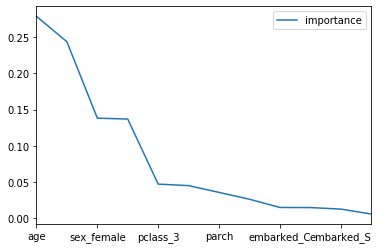

In [148]:
feature_importances_floresta.plot()

## Análise de resutados

In [149]:
# base com todos os resultados dos treinamentos dos algoritimos
# para esse modelo o melhor algorítmo foi da Regressão Logistica
resultados

,resultados,Regressão Logistica,Arvore de Decissão,Floresta Aleatorio
0,Acurácia,0.798982,0.745547,0.781170
1,Precisão,0.817490,0.787402,0.798507
2,Revocação,0.873984,0.813008,0.869919
3,F1-Measure,0.844794,0.800000,0.832685
4,ROC AUC,0.773727,0.722831,0.751286


In [150]:
# Para os modelos de Arvore de decissão e Floresta Aleatória existe divergencia na importânca das features
melhores_features

,Arvore de Decissão,Floresta Aleatoria
sex_female,0.298527,0.278412
fare,0.264507,0.243439
age,0.244617,0.138094
pclass_3,0.081260,0.136854
sibsp,0.045815,0.047216
pclass_1,0.020193,0.045124
parch,0.019755,0.035776
embarked_Q,0.011287,0.026359
embarked_C,0.011135,0.015017
embarked_S,0.002402,0.014884


In [151]:
# Funcão ira plotar um grafico dac curva de importância das features
def plotgrafico():
    plt.plot(melhores_features["Arvore de Decissão"],melhores_features.index, label='Arvore de Decissão',color='g', 	)
    plt.plot(melhores_features["Floresta Aleatoria"],melhores_features.index, label='Floresta Aleatoria', color='orange')
    plt.xlabel('Valores')
    plt.ylabel('Features')
    plt.title('Melhores Features')
    plt.legend()
    plt.show()

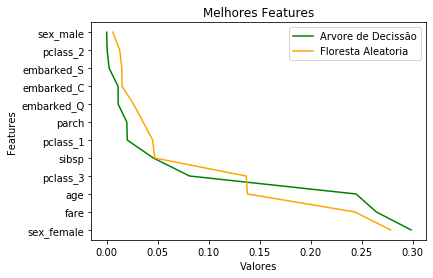

In [152]:
plotgrafico()

In [153]:
#! pip install scikit-plot

In [154]:
# Import de biblioteca para plotagem da metrica ROC
import scikitplot as skplt

C:\Users\Doglas\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


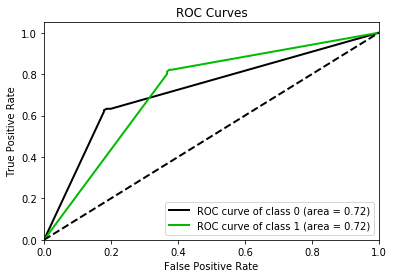

In [158]:
# Grafico da metrica ROC da arvore de dessição
skplt.metrics.plot_roc_curve(alvo_teste, arvore_previsao_proba, curves = 'each_class')
plt.show()

C:\Users\Doglas\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


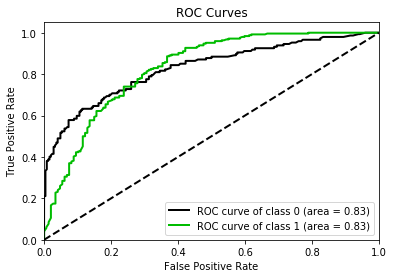

In [156]:
# Grafico da metrica ROC da Floresta Aleatória
skplt.metrics.plot_roc_curve(alvo_teste, predicted_proba, curves = 'each_class')
plt.show()